In [48]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import supplement table with ploidy data
sex_chromosome_table = pd.read_csv('Supplemental_Table_S1_copy.csv')

# import Y chromosome expression
y_expression = pd.read_csv('chrY_gene_expression.csv')

# view head of tables
sex_chromosome_table.head()

,DepMap ID,CCLE Name,COSMIC ID,Biological sex,Age,Lineage,Y ploidy,X ploidy,Genotype,Y-linked genes,X-linked genes,Chr. Y gene expression (PC1),Chr X,Chr 1,Unnamed: 14
0,ACH-000004,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,907053.0,Male,30.0,blood,Y+,X,Male_XY,0.721106,0.429216,-11.933746,NaN,NaN,NaN
1,ACH-000005,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Male,30.0,blood,Y+,X,Male_XY,0.769962,0.477896,-11.886657,NaN,NaN,NaN
2,ACH-000007,LS513_LARGE_INTESTINE,907795.0,Male,63.0,colorectal,Y+,X,Male_XY,0.531760,0.552888,-7.635678,NaN,NaN,NaN
3,ACH-000009,C2BBE1_LARGE_INTESTINE,910700.0,Male,72.0,colorectal,Y-,X,Male_X0,0.048598,0.657226,4.123415,NaN,NaN,NaN
4,ACH-000011,253J_URINARY_TRACT,NaN,Male,53.0,urinary_tract,Y-,XX,Male_XX,0.003769,0.811780,4.144126,NaN,NaN,NaN


In [5]:
# clean up tables before merging
sex_chromosome_clean = sex_chromosome_table.drop(['DepMap ID', 'COSMIC ID', 'Chr X', 'Chr 1'], axis=1)
sex_chromosome_clean.head()

,CCLE Name,Biological sex,Age,Lineage,Y ploidy,X ploidy,Genotype,Y-linked genes,X-linked genes,Chr. Y gene expression (PC1),Unnamed: 14
0,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Male,30.0,blood,Y+,X,Male_XY,0.721106,0.429216,-11.933746,NaN
1,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Male,30.0,blood,Y+,X,Male_XY,0.769962,0.477896,-11.886657,NaN
2,LS513_LARGE_INTESTINE,Male,63.0,colorectal,Y+,X,Male_XY,0.531760,0.552888,-7.635678,NaN
3,C2BBE1_LARGE_INTESTINE,Male,72.0,colorectal,Y-,X,Male_X0,0.048598,0.657226,4.123415,NaN
4,253J_URINARY_TRACT,Male,53.0,urinary_tract,Y-,XX,Male_XX,0.003769,0.811780,4.144126,NaN


In [6]:
y_expression_clean = y_expression.drop(['reported_sex', 'DDX3Y_expression_category', 'EIF1AY_expression_category', 'KDM5D_expression_category', 'NLGN4Y_expression_category', 'RPS4Y1_expression_category', 'TMSB4Y_expression_category', 'USP9Y_expression_category', 'UTY_expression_category', 'ZFY_expression_category'], axis=1)
#y_expression_clean.head()

In [32]:
# Transform chrY to base10 log

cols_to_transform = y_expression_clean.columns[1:10]

# Apply log transformation
y_expression_clean[cols_to_transform] = np.log1p(y_expression_clean[cols_to_transform])

print("DataFrame after log transformation:")
y_expression_clean.head()

DataFrame after log transformation:


,cell_line,DDX3Y_expression,EIF1AY_expression,KDM5D_expression,NLGN4Y_expression,RPS4Y1_expression,TMSB4Y_expression,USP9Y_expression,UTY_expression,ZFY_expression
0,X22RV1_PROSTATE,1.216882,1.179420,1.200868,1.131830,1.236046,1.083492,1.194028,1.154822,8.166784
1,X2313287_STOMACH,1.203229,1.162319,1.191637,0.554618,1.219741,0.423036,1.187741,1.148124,7.431892
2,X253JBV_URINARY_TRACT,0.786048,0.706395,0.423036,NaN,0.956848,NaN,0.706395,0.625800,0.693147
3,X253J_URINARY_TRACT,0.820286,0.732569,0.753653,0.554618,0.943907,NaN,0.706395,0.423036,1.609438
4,X42MGBA_CENTRAL_NERVOUS_SYSTEM,0.869294,0.000000,0.786048,0.423036,0.934207,NaN,0.554618,NaN,0.000000


In [34]:
# Merge DataFrames on 'CCLE Name' and 'cell_name', and drop rows without a match
merged_df = pd.merge(sex_chromosome_clean, y_expression_clean, left_on='CCLE Name', right_on='cell_line', how='inner')

# Drop the duplicate column
merged_df.drop(columns=['cell_line', 'Unnamed: 14'], inplace=True)

print(f'Merged database:')
merged_df.head()


Merged database:


,CCLE Name,Biological sex,Age,Lineage,Y ploidy,X ploidy,Genotype,Y-linked genes,X-linked genes,Chr. Y gene expression (PC1),DDX3Y_expression,EIF1AY_expression,KDM5D_expression,NLGN4Y_expression,RPS4Y1_expression,TMSB4Y_expression,USP9Y_expression,UTY_expression,ZFY_expression
0,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Male,30.0,blood,Y+,X,Male_XY,0.721106,0.429216,-11.933746,1.232898,1.207730,1.225294,0.423036,1.255326,1.109565,1.190534,1.194333,8.181441
1,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Male,30.0,blood,Y+,X,Male_XY,0.769962,0.477896,-11.886657,1.241658,1.211982,1.223542,NaN,1.246459,1.101718,1.189097,1.197676,8.575273
2,LS513_LARGE_INTESTINE,Male,63.0,colorectal,Y+,X,Male_XY,0.531760,0.552888,-7.635678,1.197218,1.170855,1.176093,0.554618,1.243779,1.052766,1.135101,1.146484,7.664347
3,C2BBE1_LARGE_INTESTINE,Male,72.0,colorectal,Y-,X,Male_X0,0.048598,0.657226,4.123415,0.869294,0.672503,0.672503,0.672503,0.929876,NaN,0.786048,0.000000,1.386294
4,HCC827_LUNG,Female,39.0,lung,Y-,XX,Female_XXhet,0.016552,1.095052,4.066216,0.902628,0.786048,0.706395,NaN,0.966273,0.423036,0.837467,0.753653,2.564949


/var/folders/hc/0r0gnp0j2gd96tblv3r1bf6m0000gn/T/ipykernel_57627/1152463974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_df, x='Y ploidy', y='DDX3Y_expression', palette='viridis')


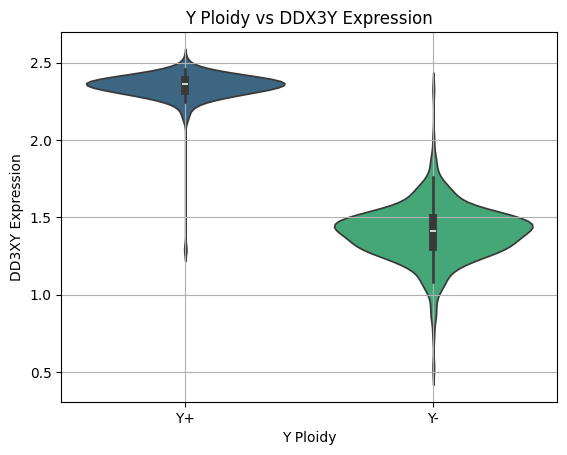

In [16]:
# Y Ploidy and DDX3Y expression
sns.violinplot(data=merged_df, x='Y ploidy', y='DDX3Y_expression', palette='viridis')
plt.title('Y Ploidy vs DDX3Y Expression')
plt.xlabel('Y Ploidy')
plt.ylabel('DD3XY Expression')
plt.grid(True)
plt.show()


/var/folders/hc/0r0gnp0j2gd96tblv3r1bf6m0000gn/T/ipykernel_57627/3761445765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_df, x='Y ploidy', y='EIF1AY_expression', palette='viridis')


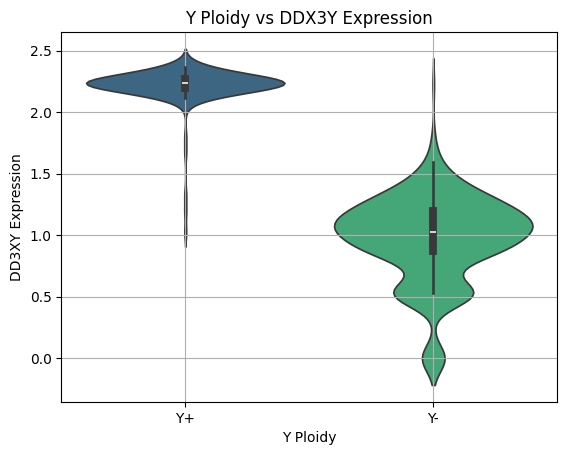

In [17]:
# Y Ploidy and DDX3Y expression
sns.violinplot(data=merged_df, x='Y ploidy', y='EIF1AY_expression', palette='viridis')
plt.title('Y Ploidy vs DDX3Y Expression')
plt.xlabel('Y Ploidy')
plt.ylabel('DD3XY Expression')
plt.grid(True)
plt.show()


/var/folders/hc/0r0gnp0j2gd96tblv3r1bf6m0000gn/T/ipykernel_57627/562855367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_df, x='X ploidy', y='DDX3Y_expression', palette='viridis')


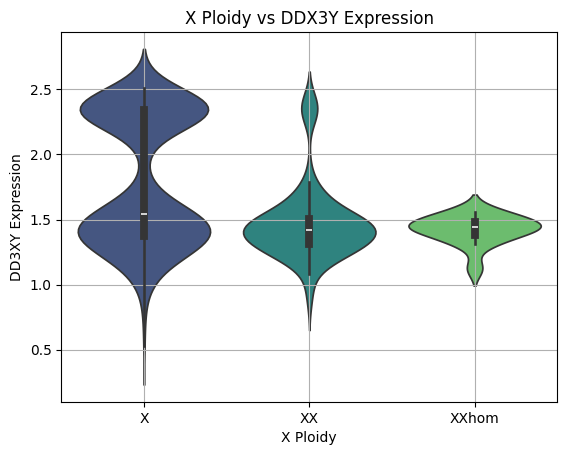

In [18]:
# X Ploidy and DDX3Y expression
sns.violinplot(data=merged_df, x='X ploidy', y='DDX3Y_expression', palette='viridis')
plt.title('X Ploidy vs DDX3Y Expression')
plt.xlabel('X Ploidy')
plt.ylabel('DD3XY Expression')
plt.grid(True)
plt.show()


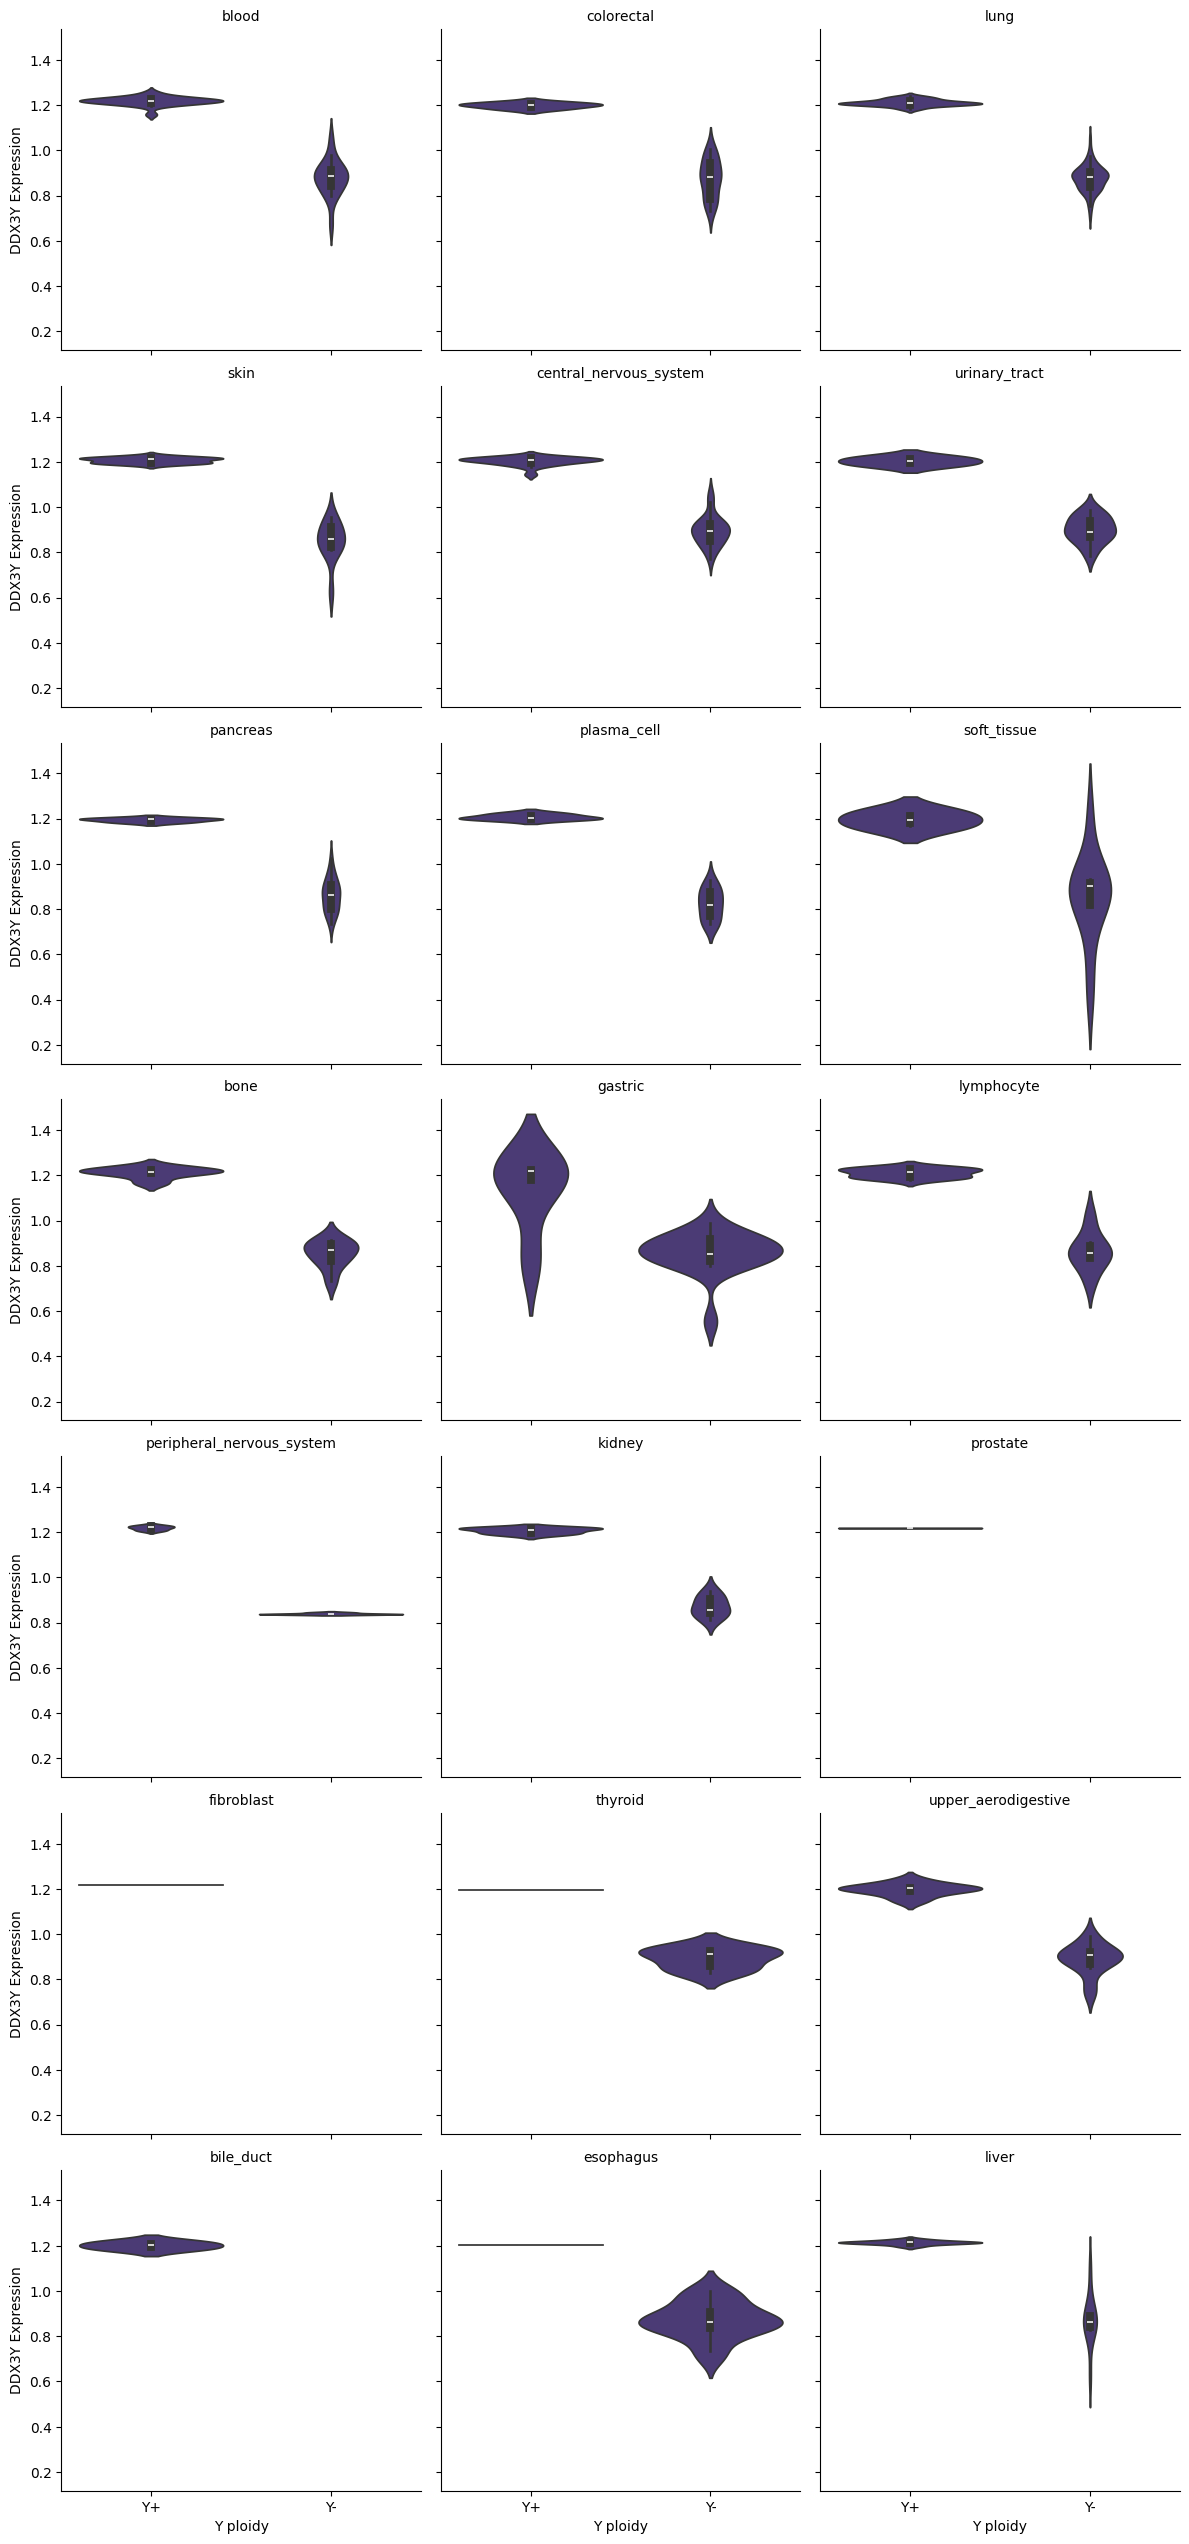

In [65]:
# drop cervix, breast, and uterus columns
female_tissue = ['breast', 'cervix', 'uterus', 'ovary']
male_tissues = merged_df[~merged_df['Lineage'].isin(female_tissue)]

male_tissues.head()

sns.set_palette('viridis')

# Draw a categorical scatterplot to show each observation
lineage_DD3XY = sns.FacetGrid(male_tissues, col='Lineage', col_wrap=3, height=4)
lineage_DD3XY.map_dataframe(sns.violinplot, x='Y ploidy', y='DDX3Y_expression')
lineage_DD3XY.set_titles(col_template="{col_name}")
lineage_DD3XY.set_axis_labels("Y ploidy", "DDX3Y Expression")
plt.subplots_adjust(top=0.9)
plt.show()

/opt/anaconda3/envs/copy_number/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/anaconda3/envs/copy_number/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/copy_number/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/copy_number/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

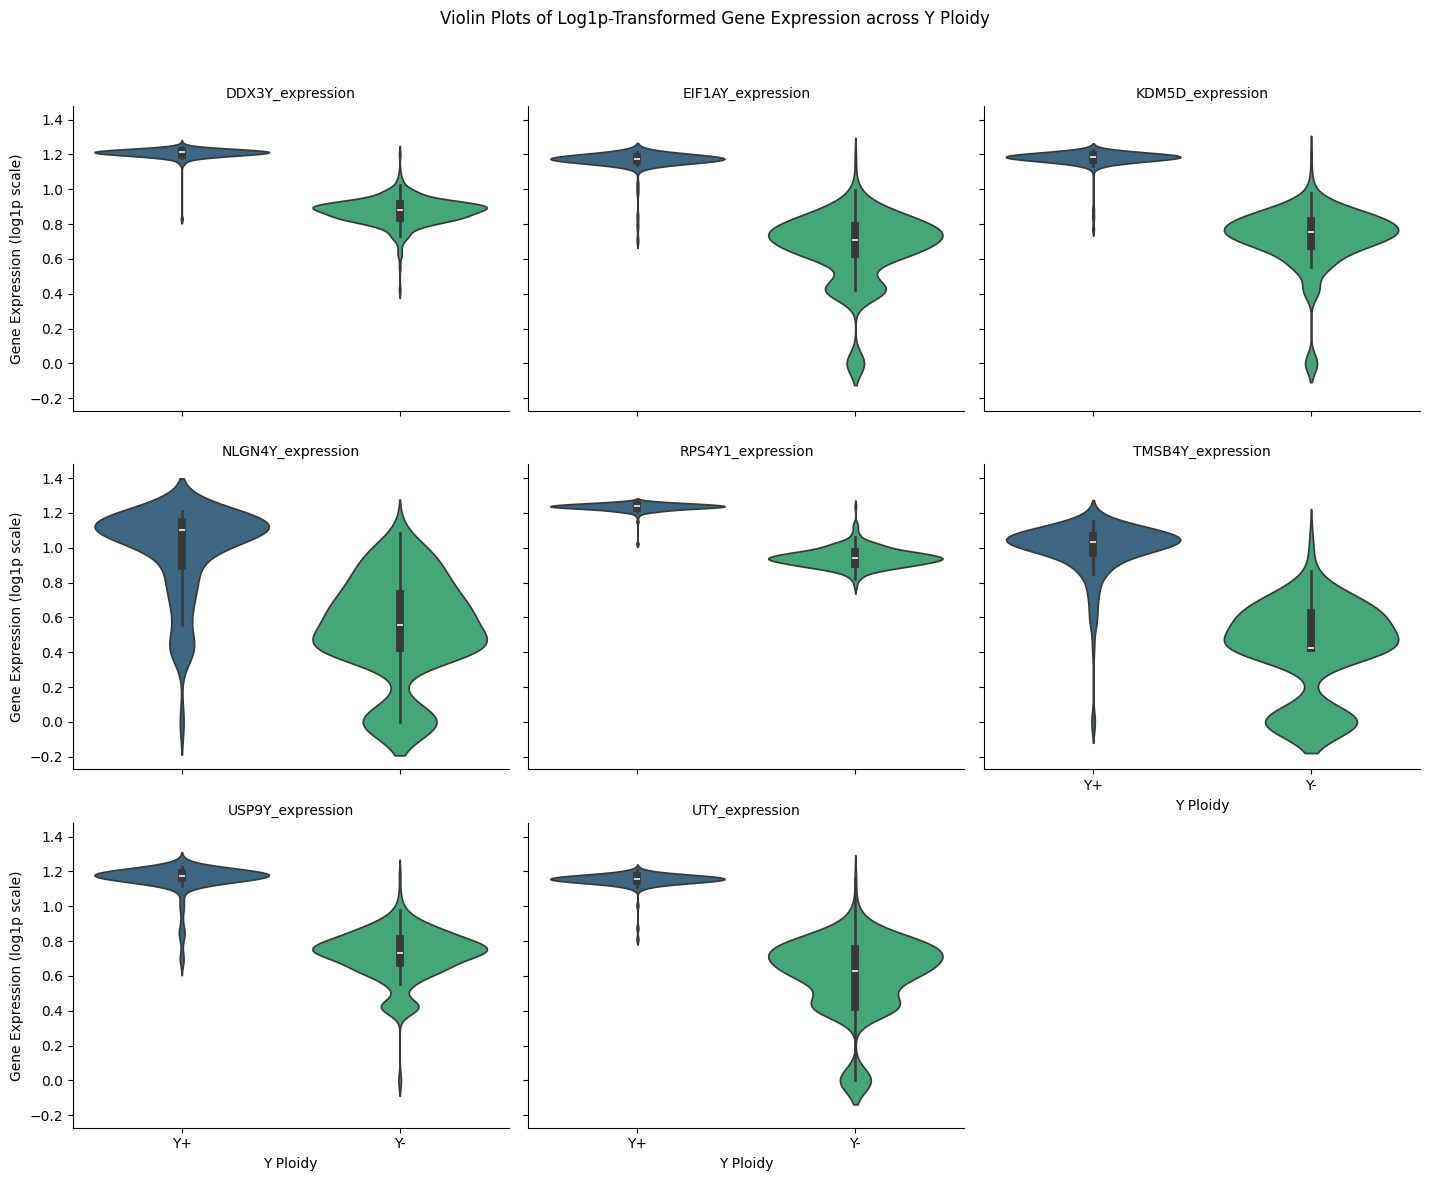

In [59]:
# Filter out columns that are not needed for plotting
male_tissue_long = pd.melt(merged_df, id_vars=['CCLE Name', 'Y ploidy'], 
                         value_vars=['DDX3Y_expression', 'EIF1AY_expression', 'KDM5D_expression', 
                                     'NLGN4Y_expression', 'RPS4Y1_expression', 'TMSB4Y_expression',
                                     'USP9Y_expression', 'UTY_expression'],
                         var_name='Gene', value_name='Expression')


# Initialize a FacetGrid with Seaborn
Yploidy_gene_expression = sns.FacetGrid(male_tissue_long, col='Gene', col_wrap=3, height=4, aspect=1.2)
# Create violin plots on the FacetGrid
Yploidy_gene_expression.map(sns.violinplot, 'Y ploidy', 'Expression', palette='viridis')
# Set titles and labels
Yploidy_gene_expression.set_titles("{col_name}")
Yploidy_gene_expression.set_axis_labels('Y Ploidy', 'Gene Expression (log1p scale)')
# Adjust layout
plt.subplots_adjust(top=0.9)
Yploidy_gene_expression.fig.suptitle('Violin Plots of Log1p-Transformed Gene Expression across Y Ploidy')

plt.show()